<a href="https://colab.research.google.com/github/DeveloperSubham/GRIP-TSF-Internship-Tasks/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Explore Unsupervised Machine Learning

# K- Means Clustering

In this task we have to predict the optimum number of clusters from the 'Iris' datset and represent it visually.

In [59]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

In [23]:
#Loading and Reading the dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [24]:
iris_df.shape

(150, 4)

In [25]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [27]:
X = iris_df[["petal length (cm)", "sepal length (cm)"]]

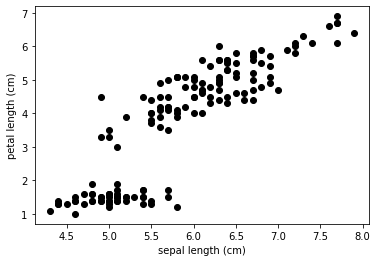

In [28]:
#visualize the data points

plt.scatter(X["sepal length (cm)"],X["petal length (cm)"],c='black')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

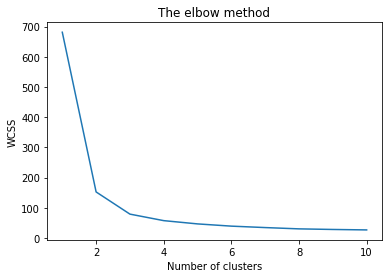

In [29]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**This is called 'The elbow method'. From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

In [30]:
#number of clusters
K = 3

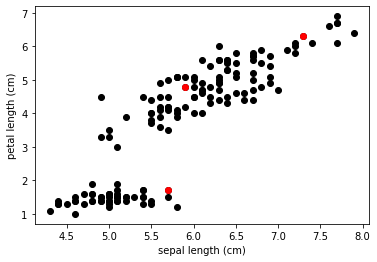

In [31]:
#select random observations as centroid

Centroids = (X.sample(n=K))
plt.scatter(X["sepal length (cm)"],X["petal length (cm)"],c='black')
plt.scatter(Centroids["sepal length (cm)"],Centroids["petal length (cm)"],c='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [33]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [34]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

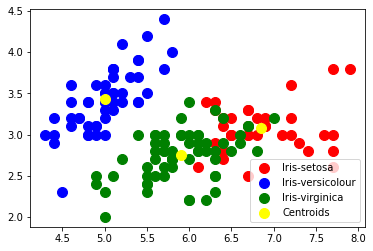

In [40]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [41]:
kmeans = KMeans(n_clusters=3)

In [43]:
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
pred=kmeans.predict(iris_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [48]:
pd.Series(pred).value_counts()

2    62
1    50
0    38
dtype: int64

In [49]:
kmeans.inertia_

78.85144142614601

In [51]:
kmeans.score(iris_df)

-78.85144142614655

In [54]:
SSE =[]

for cluster in range(1,20):
    kmeans = KMeans(n_jobs=-1, n_clusters=cluster)
    kmeans.fit(iris_df)
    SSE.append(kmeans.inertia_)

In [56]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

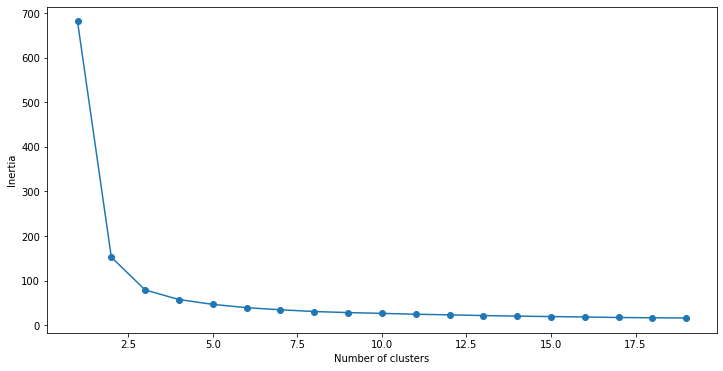

In [63]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled = scaler.fit_transform(iris_df)

In [65]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [72]:
kmeans = KMeans(n_jobs = -1, n_clusters = 8)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [73]:
pred

array([1, 6, 6, 6, 1, 5, 1, 1, 6, 6, 5, 1, 6, 6, 5, 5, 5, 1, 5, 5, 1, 1,
       1, 1, 1, 6, 1, 1, 1, 6, 6, 1, 5, 5, 6, 6, 1, 1, 6, 1, 1, 6, 6, 1,
       5, 6, 5, 6, 5, 1, 0, 0, 0, 3, 4, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0,
       0, 3, 3, 3, 0, 0, 4, 0, 0, 0, 4, 4, 0, 3, 3, 3, 3, 4, 0, 0, 0, 3,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 7, 4, 2, 4, 7, 2, 3, 2, 4, 7,
       7, 4, 7, 4, 4, 7, 4, 7, 2, 3, 7, 4, 2, 4, 7, 7, 4, 0, 4, 2, 2, 7,
       4, 4, 4, 2, 7, 4, 0, 7, 7, 7, 4, 7, 7, 7, 4, 4, 7, 0], dtype=int32)

In [74]:
frame = pd.DataFrame(data_scaled)

In [76]:
frame['cluster'] = pred
frame['cluster'].value_counts()

0    29
4    23
3    21
1    21
7    19
6    17
5    12
2     8
Name: cluster, dtype: int64

In [77]:
frame.head()

,0,1,2,3,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,6
2,-1.385353,0.328414,-1.397064,-1.315444,6
3,-1.506521,0.098217,-1.283389,-1.315444,6
4,-1.021849,1.249201,-1.340227,-1.315444,1
